In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
bank_df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',"Data")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
# finding the output for the random forest

from sklearn.ensemble import RandomForestClassifier 

In [20]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [21]:
feature_df = RandomForestClassifier(n_estimators = 1000 , max_features = 2 , oob_score = True)

In [24]:
print(feature_df)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)


In [27]:
features = ["Age" , 'Experience' , 'Income' , 'Education','Family',]  

In [102]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [103]:
print("OOB Accuracy:")
print(rf_model.oob_score_)

OOB Accuracy:
0.9608


In [104]:
imporances = rf_model.feature_importances_

In [105]:
 for feature , imp in zip(features , rf_model.feature_importances_):
    print(feature,imp)

Age 0.08840110974595213
Experience 0.08242989117953066
Income 0.6039907225929545
Education 0.22517827648156274


In [106]:
rf_model.feature_importances_

array([0.08840111, 0.08242989, 0.60399072, 0.22517828])

In [107]:
features

['Age', 'Experience', 'Income', 'Education']

In [108]:
feature,imp

('Education', 0.22517827648156274)

# Creating a descision tree

In [10]:
from sklearn import tree

In [11]:
tree_model = tree.DecisionTreeClassifier()

In [126]:
tree_model.fit(X = pd.DataFrame(bank_df["Education"]), y = pd.DataFrame(bank_df["Personal Loan"]))

DecisionTreeClassifier()

In [111]:
with open("Dtree_loan.dot" , 'w') as f:
    f = tree.export_graphviz(tree_model , feature_names = ["Education"] , out_file =f)

[Text(133.92000000000002, 181.2, 'X[0] <= 1.5\ngini = 0.174\nsamples = 5000\nvalue = [4520, 480]'),
 Text(66.96000000000001, 108.72, 'gini = 0.085\nsamples = 2096\nvalue = [2003, 93]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 2.5\ngini = 0.231\nsamples = 2904\nvalue = [2517, 387]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.226\nsamples = 1403\nvalue = [1221, 182]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.236\nsamples = 1501\nvalue = [1296, 205]')]

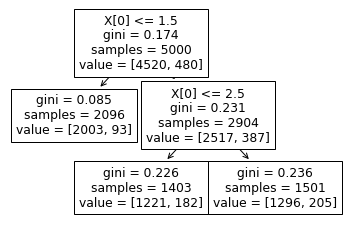

In [112]:
tree.plot_tree(tree_model)

In [118]:
tree_model.score(X = pd.DataFrame(bank_df["Education"]), y = pd.DataFrame(bank_df["Personal Loan"]))

0.904

# DV => Personal Loan
# IDV => Income

In [127]:
tree_model.fit(X = pd.DataFrame(bank_df["Income"]), y = pd.DataFrame(bank_df["Personal Loan"]))

DecisionTreeClassifier()

In [130]:
with open("Dtree_loan1.dot" , 'w') as f:
    f = tree.export_graphviz(tree_model , feature_names = ["Income"] , out_file =f)

[Text(145.102868852459, 210.192, 'X[0] <= 113.5\ngini = 0.174\nsamples = 5000\nvalue = [4520, 480]'),
 Text(64.83319672131148, 195.696, 'X[0] <= 92.5\ngini = 0.041\nsamples = 4021\nvalue = [3937, 84]'),
 Text(40.47786885245902, 181.2, 'X[0] <= 82.5\ngini = 0.014\nsamples = 3638\nvalue = [3613, 25]'),
 Text(23.32622950819672, 166.704, 'X[0] <= 63.5\ngini = 0.005\nsamples = 3272\nvalue = [3263, 9]'),
 Text(13.721311475409836, 152.208, 'X[0] <= 59.5\ngini = 0.001\nsamples = 2490\nvalue = [2489, 1]'),
 Text(10.97704918032787, 137.712, 'gini = 0.0\nsamples = 2280\nvalue = [2280, 0]'),
 Text(16.465573770491805, 137.712, 'X[0] <= 60.5\ngini = 0.009\nsamples = 210\nvalue = [209, 1]'),
 Text(13.721311475409836, 123.216, 'gini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(19.20983606557377, 123.216, 'gini = 0.0\nsamples = 158\nvalue = [158, 0]'),
 Text(32.93114754098361, 152.208, 'X[0] <= 76.5\ngini = 0.02\nsamples = 782\nvalue = [774, 8]'),
 Text(27.442622950819672, 137.712, 'X[0] <= 74.5\ngi

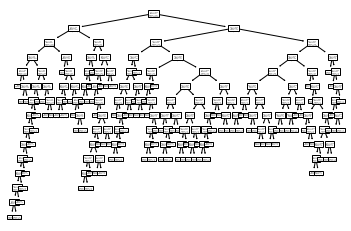

In [131]:
tree.plot_tree(tree_model)

In [141]:
tree_model.score(X = pd.DataFrame(bank_df["Income"]), y = pd.DataFrame(bank_df["Personal Loan"]))

0.904

# IDV = > Family
# Dv = > Personal Loan

In [133]:
tree_model.fit(X = pd.DataFrame(bank_df["Family"]), y = pd.DataFrame(bank_df["Personal Loan"]))

DecisionTreeClassifier()

In [150]:
with open("Dtree_loan.dot2" , 'w') as f:
    f = tree.export_graphviz(tree_model , feature_names = ["Family"] , out_file =f)

[Text(167.4, 181.2, 'X[0] <= 2.5\ngini = 0.174\nsamples = 5000\nvalue = [4520, 480]'),
 Text(83.7, 108.72, 'X[0] <= 1.5\ngini = 0.142\nsamples = 2768\nvalue = [2555, 213]'),
 Text(41.85, 36.23999999999998, 'gini = 0.135\nsamples = 1472\nvalue = [1365, 107]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.15\nsamples = 1296\nvalue = [1190, 106]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 3.5\ngini = 0.211\nsamples = 2232\nvalue = [1965, 267]'),
 Text(209.25, 36.23999999999998, 'gini = 0.229\nsamples = 1010\nvalue = [877, 133]'),
 Text(292.95, 36.23999999999998, 'gini = 0.195\nsamples = 1222\nvalue = [1088, 134]')]

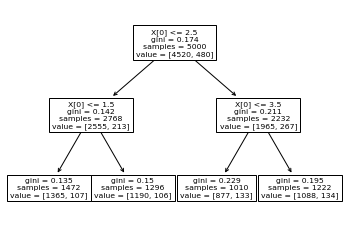

In [138]:
tree.plot_tree(tree_model)

In [143]:
tree_model.score(X = pd.DataFrame(bank_df["Family"]), y = pd.DataFrame(bank_df["Personal Loan"]))

0.904

# IDV = > Experience
# DV = > Personal Loan

In [144]:
tree_model.fit(X = pd.DataFrame(bank_df["Experience"]), y = pd.DataFrame(bank_df["Personal Loan"]))

DecisionTreeClassifier()

In [151]:
with open("Dtree_loan.dot3" , 'w') as f:
    f = tree.export_graphviz(tree_model , feature_names = ["Experience"] , out_file =f)

[Text(132.91250000000002, 209.6742857142857, 'X[0] <= -0.5\ngini = 0.174\nsamples = 5000\nvalue = [4520, 480]'),
 Text(124.64583333333334, 194.14285714285714, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(141.17916666666667, 194.14285714285714, 'X[0] <= 12.5\ngini = 0.175\nsamples = 4948\nvalue = [4468, 480]'),
 Text(101.26666666666668, 178.61142857142858, 'X[0] <= 11.5\ngini = 0.198\nsamples = 1455\nvalue = [1293, 162]'),
 Text(93.00000000000001, 163.07999999999998, 'X[0] <= 9.5\ngini = 0.193\nsamples = 1353\nvalue = [1207, 146]'),
 Text(70.26666666666668, 147.54857142857142, 'X[0] <= 7.5\ngini = 0.2\nsamples = 1119\nvalue = [993, 126]'),
 Text(49.60000000000001, 132.01714285714286, 'X[0] <= 3.5\ngini = 0.185\nsamples = 853\nvalue = [765, 88]'),
 Text(33.06666666666667, 116.48571428571428, 'X[0] <= 2.5\ngini = 0.205\nsamples = 354\nvalue = [313, 41]'),
 Text(24.800000000000004, 100.9542857142857, 'X[0] <= 1.5\ngini = 0.191\nsamples = 225\nvalue = [201, 24]'),
 Text(16.5333333333

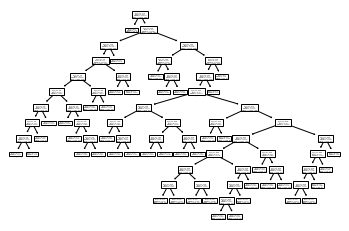

In [146]:
tree.plot_tree(tree_model)

In [147]:
tree_model.score(X = pd.DataFrame(bank_df["Experience"]), y = pd.DataFrame(bank_df["Personal Loan"]))

0.904

# IDV = > Age
# Dv = > Personal loan

In [148]:
tree_model.fit(X = pd.DataFrame(bank_df["Age"]), y = pd.DataFrame(bank_df["Personal Loan"]))

DecisionTreeClassifier()

In [152]:
with open("Dtree_loan4.dot" , 'w') as f:
    f = tree.export_graphviz(tree_model , feature_names = ["Age"] , out_file =f)

In [153]:
tree_model.score(X = pd.DataFrame(bank_df["Age"]), y = pd.DataFrame(bank_df["Personal Loan"]))

0.904